In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from dataset import load_seismic_h5, bandpass, preprocess_seismic

H5_PATH = "/home/joe/seismic-edge-detect/data/SEISMIC/ci39490952.h5"

# Load raw DAS data
data, dt, dx = load_seismic_h5(H5_PATH)
fs = 1.0 / dt
n_channels, n_times = data.shape

print("Data shape:", data.shape)
print("dt:", dt, "fs:", fs)

def robust_scale(arr, percentile=99):
    vmax = np.percentile(np.abs(arr), percentile)
    return np.clip(arr, -vmax, vmax)


Data shape: (1149, 3582)
dt: 0.01 fs: 100.0


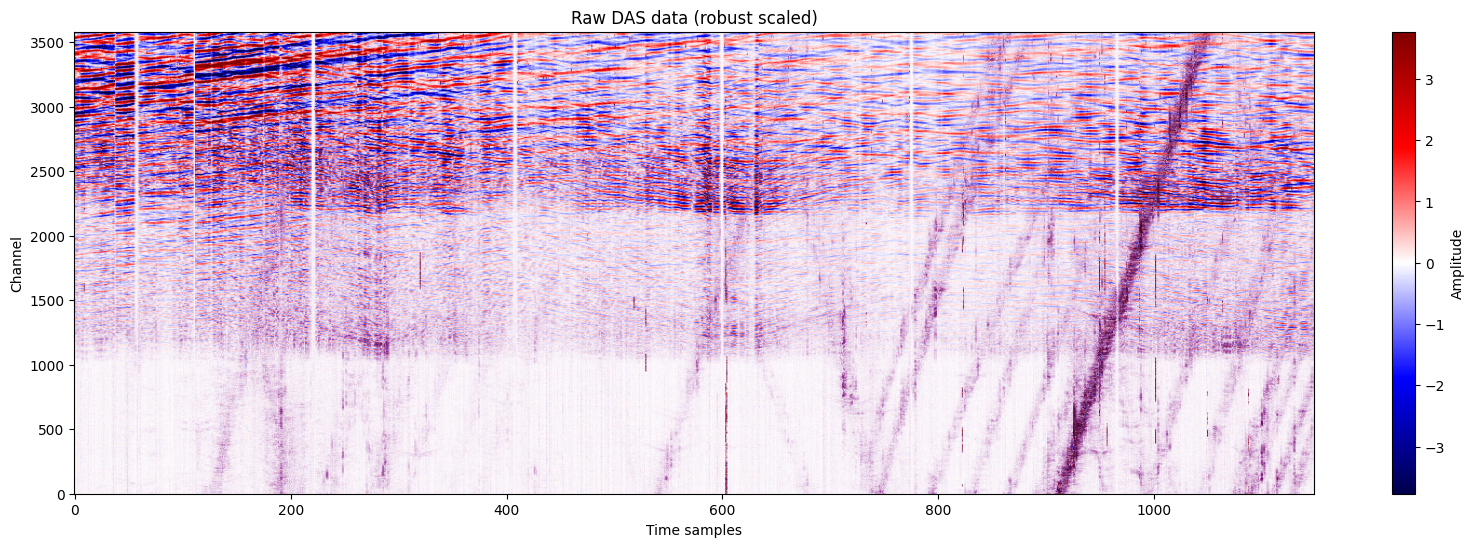

In [3]:
# --- Raw DAS plot ---
plt.figure(figsize=(20, 6))
plt.imshow(
    robust_scale(data, 99).T,  # transpose: channels vertical
    aspect="auto",
    cmap="seismic",
    origin="lower"
)
plt.colorbar(label="Amplitude")
plt.xlabel("Time samples")
plt.ylabel("Channel")
plt.title("Raw DAS data (robust scaled)")
plt.show()



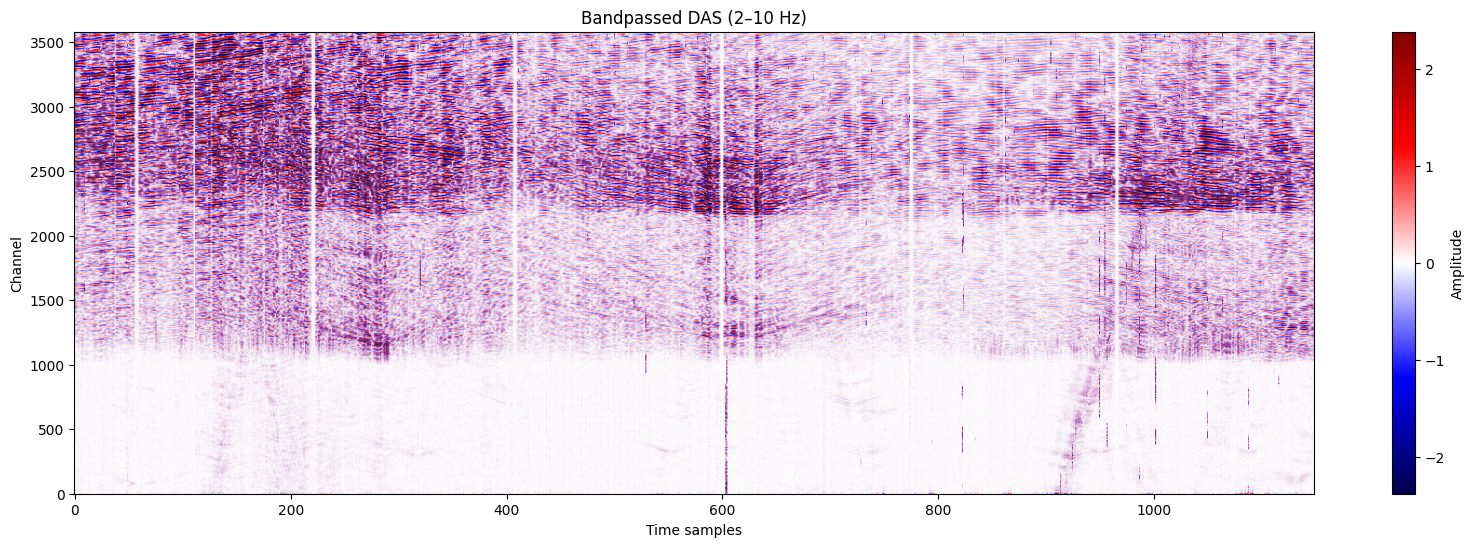

In [4]:
# --- Bandpass filtered ---
data_filt = bandpass(data, fs, lowcut=2, highcut=10)

plt.figure(figsize=(20, 6))
plt.imshow(
    robust_scale(data_filt, 99).T,
    aspect="auto",
    cmap="seismic",
    origin="lower"
)
plt.colorbar(label="Amplitude")
plt.xlabel("Time samples")
plt.ylabel("Channel")
plt.title("Bandpassed DAS (2–10 Hz)")
plt.show()


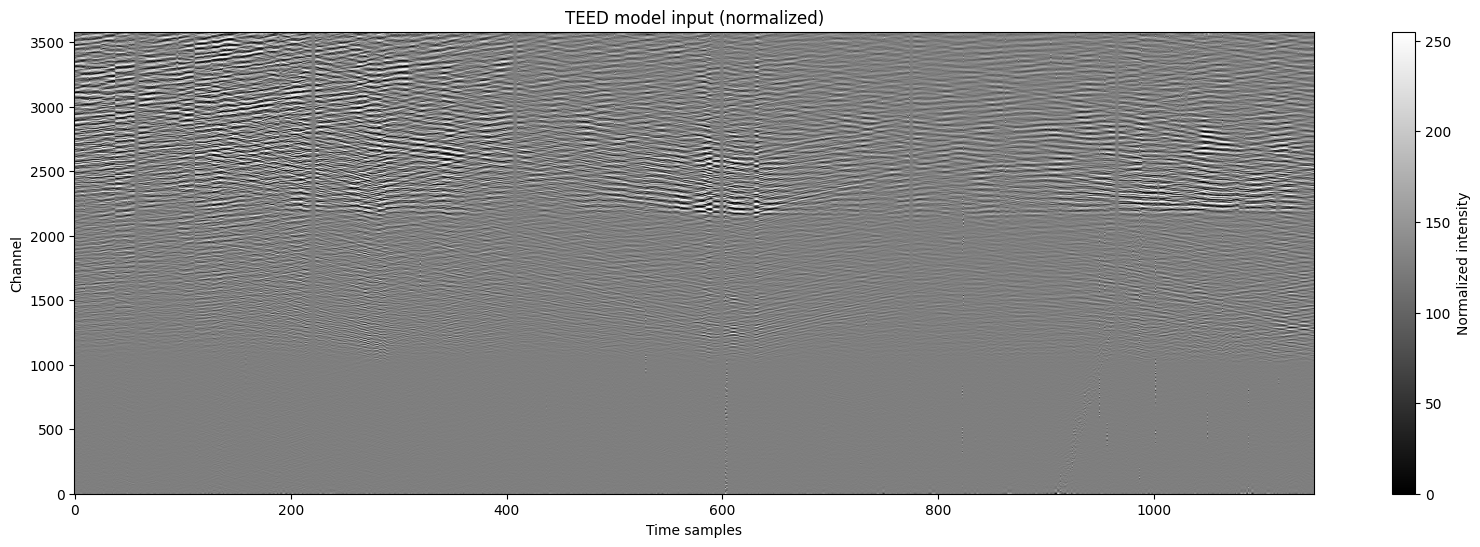

In [5]:
# --- TEED preprocessing ---
img = preprocess_seismic(data, dt)  # usually normalized internally
img_gray = img[:, :, 0]

plt.figure(figsize=(20, 6))
plt.imshow(
    img_gray.T,  # transpose: channels vertical
    aspect="auto",
    cmap="gray",
    origin="lower"
)
plt.colorbar(label="Normalized intensity")
plt.xlabel("Time samples")
plt.ylabel("Channel")
plt.title("TEED model input (normalized)")
plt.show()


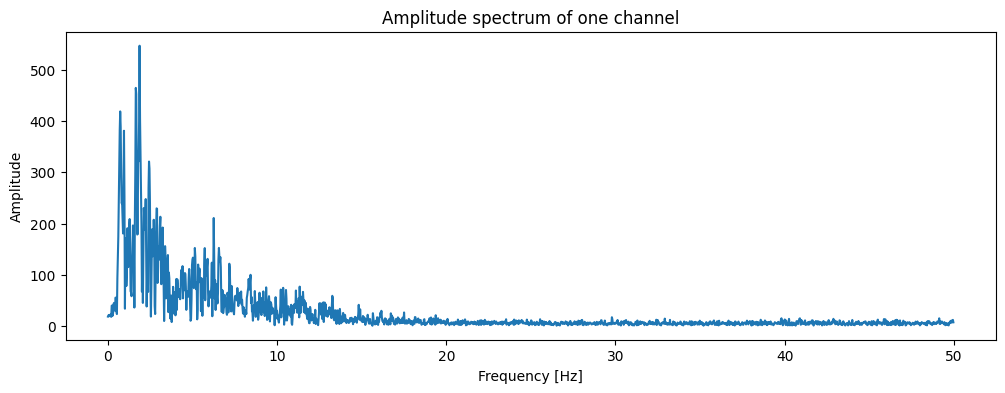

In [6]:
from scipy.fft import fft, fftfreq

sample = data[0]  # pick one channel
N = len(sample)
freqs = fftfreq(N, dt)
spec = np.abs(fft(sample))

plt.figure(figsize=(12,4))
plt.plot(freqs[:N//2], spec[:N//2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Amplitude spectrum of one channel")
plt.show()
